# Lesson 0 - Python Basics

We will use the [LxMLS lab guide](http://lxmls.it.pt/2018/LxMLS_guide_2018.pdf) here, from pages 4 to 29.

## 0.4.4 - Matplotlib

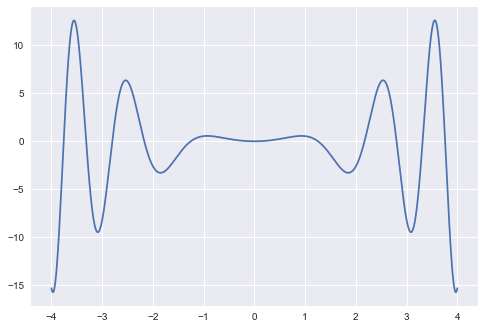

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import figure

style.use('seaborn')

X = np.linspace(-4, 4, 1000)
# linspace will return 1000 points, evenly spaced between -4 and 4

plt.plot(X, X**2*np.cos(X**2))
plt.savefig("044simple.pdf")

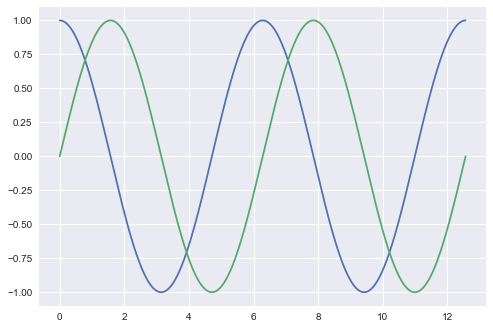

In [137]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 4*np.pi, 1000)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

In [138]:
import numpy as np

A = np.arange(100)

print(np.mean(A))
print(A.mean())

C = np.cos(A)
print(C.ptp())
np.ptp?

49.5
49.5
1.99996082639


In [139]:
a = np.array([[2, 3],[3, 4]])
b = np.array([[1, 1],[1, 1]])
a_dim1, a_dim2 = a.shape
b_dim1, b_dim2 = b.shape
c = np.zeros([a_dim1, b_dim2])

for i in range(a_dim1):
    for j in range(b_dim2):
        for k in range(a_dim2):
            c[i,j] += a[i,k]*b[j,k]

print(c)

d = np.dot(a, b)
print(d)

[[ 5.  5.]
 [ 7.  7.]]
[[5 5]
 [7 7]]


In [142]:
a = np.array([1,2])
b = np.array([1,1])

# Inner product
inner_product = np.dot(a,b)
print("inner product \n", inner_product)

# Outer product
outer_product = np.outer(a, b)
print("outer product \n", outer_product)

inner product 
 3
outer product 
 [[1 1]
 [2 2]]


In [143]:
# Identity matrix
I = np.eye(2)
print(I)

[[ 1.  0.]
 [ 0.  1.]]


In [144]:
a = np.array([[1, 2], [3, 4]])

print(a)

# In numpy, you represent a transpose matrix by using the T attribute

print("transpose of a")
print(a.T)

[[1 2]
 [3 4]]
transpose of a
[[1 3]
 [2 4]]


## Probability basics

In [145]:
import lxmls.readers.galton as galton
galton_data = galton.load()
print(galton_data)

[[ 70.5  61.7]
 [ 68.5  61.7]
 [ 65.5  61.7]
 ..., 
 [ 69.5  73.7]
 [ 69.5  73.7]
 [ 69.5  73.7]]


### 1.1) What's the mean height and standard deviation of all the people in the sample?

In [146]:
mean_height = galton_data.mean()
print(mean_height)

std_dev = galton_data.std()
print(std_dev)

68.1983297414
2.18500039728


### 1.2) What is the mean height of the pathers and of the sons?

In [147]:
mean_height_fathers = np.mean(galton_data[:,0])
mean_height_sons = np.mean(galton_data[:,1])

print("mean height of the fathers is ", round(mean_height_fathers, 2))
print("mean height of the sons is ", round(mean_height_sons,2))

mean height of the fathers is  68.31
mean height of the sons is  68.09


### 2) Plot a histogram of all the heights

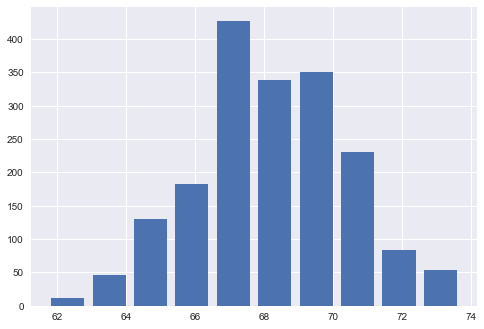

In [148]:
flat_galton_data = galton_data.ravel()

plt.hist(flat_galton_data, rwidth=0.8)
plt.savefig("flat_galton_data.pdf")

### 3) Plot the height of the fathers versus the height of the sons

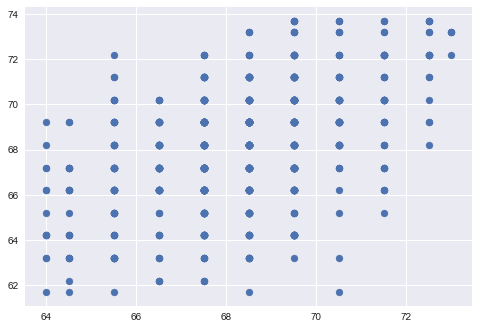

In [149]:
# On the x axis, we have the height of the fathes

x_axis = galton_data[:, 0]
y_axis = galton_data[:, 1]

plt.scatter(x_axis, y_axis)

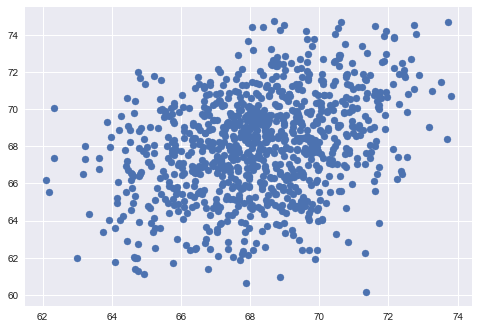

In [150]:
# Let's add a little bit of randomization on our dataset

x_axis_jitter = np.random.randn(len(x_axis))
new_x_axis = x_axis + x_axis_jitter

y_axis_jitter = np.random.randn(len(y_axis))
new_y_axis = y_axis + y_axis_jitter

plt.scatter(new_x_axis, new_y_axis)

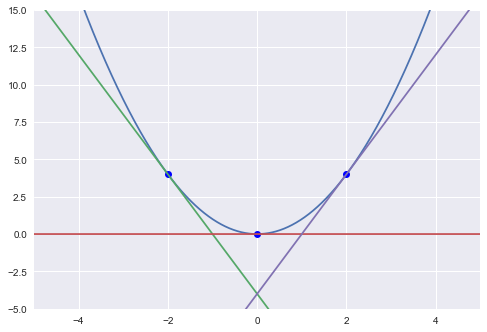

In [175]:
x = np.arange(-8, 8, 0.001)
f_x = np.power(x, 2)

plt.plot(x, f_x)
plt.xlim(-5, 5)
plt.ylim(-5, 15)

## let me plot my points -2, 0, 2

k = np.array([-2, 0, 2])
plt.plot(k, k**2, "bo")

for i in k:
    plt.plot(x, (2*i)*x - (i**2))

### Consider the function below:

$$f(x) = (x+2)^{2}-16exp(-(x-2)^{2})$$

Make a function that computes the function value given x.

In [176]:
def get_y(x):
    return (x+2)**2 - 16*np.exp(-((x-2)**2))

In [177]:
x_axis = np.arange(-8, 8, 0.01)
y_axis = get_y(x_axis)

In [154]:
def get_grad(x):
    return (2*x+4)-16*(-2*x + 4)*np.exp(-((x-2)**2))

In [161]:
def gradient_descent(start_x, func, grad, step_size=0.05):
    # define my precision
    precision = 0.001
    # define my maximum iteractions
    max_iter = 1000
    # create a list to append my partial results
    res = []
    x_new = start_x
    for i in range(max_iter):
        x_old = x_new
        x_new = x_old - step_size * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        if (abs(f_x_new - f_x_old) < precision):
            print("Reached a minimum after",i, "iterations, leaving")
            return(np.array(res))
    print("Maximum iterations reached, leaving")
    return(np.array(res))

Reached a minimum after 42 iterations, leaving


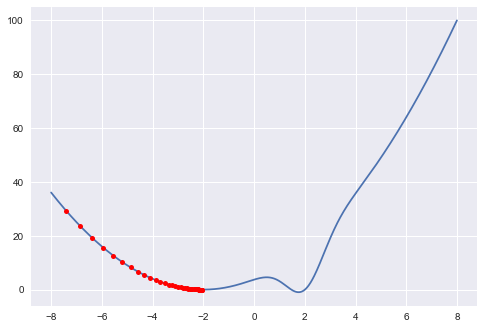

In [162]:
x_0 = -8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x_axis, y_axis)
plt.plot(res[:, 0], res[:, 1], 'ro', markersize=5)

Reached a minimum after 9 iterations, leaving


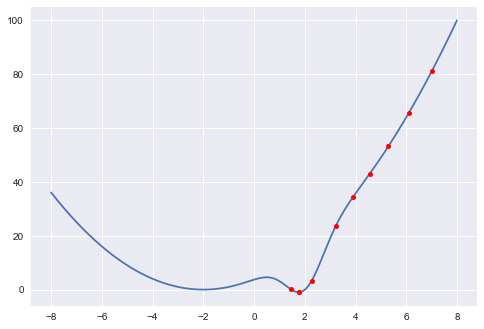

In [163]:
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x_axis, y_axis)
plt.plot(res[:, 0], res[:, 1], 'ro', markersize=5)

Reached a minimum after 21 iterations, leaving


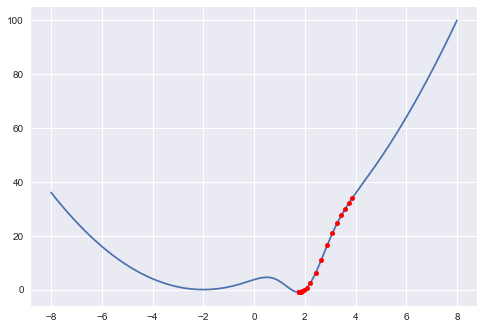

In [165]:
x_0 = 4
res = gradient_descent(x_0, get_y, get_grad, step_size=0.01)
plt.plot(x_axis, y_axis)
plt.plot(res[:, 0], res[:, 1], 'ro', markersize=5)